In [ ]:
import numpy as np        
import pandas as pd       
import matplotlib.pyplot as plt  
import nltk
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin1')


encoding='latin1': Specifies the character encoding used in the file.The "latin1" encoding is often used when the dataset contains special characters not handled by the default encoding (utf-8).

In [3]:
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
data.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [ ]:
data.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

In [ ]:
counts = data['target'].value_counts()

print(counts)

target
ham     4825
spam     747
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['target'] = encoder.fit_transform(data['target'])

In [9]:
data.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
data.duplicated().sum()

403

In [ ]:
data = data.drop_duplicates(keep = 'first')


In [13]:
data.shape

(5169, 2)

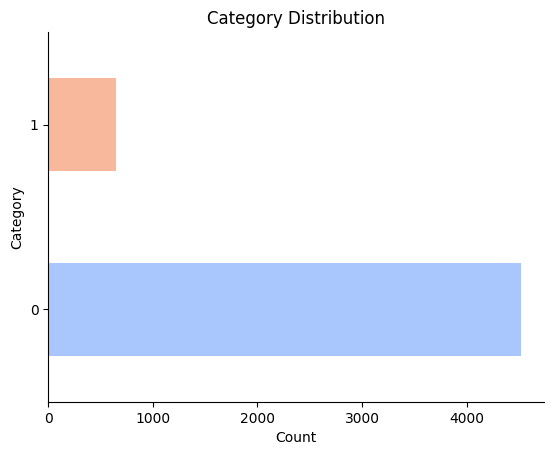

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('target').size().plot(
    kind='barh',
    color=sns.color_palette('coolwarm', n_colors=2)

plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Category Distribution')
plt.show()


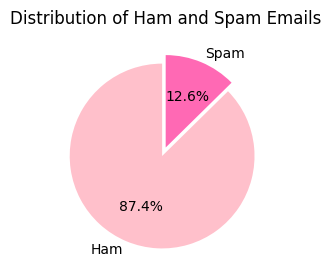

In [ ]:
from matplotlib import pyplot as plt

counts = data['target'].value_counts()


labels = ['Ham', 'Spam']
colors = ['#FFC0CB', '#FF69B4']  
plt.figure(figsize=(3, 3))
plt.pie(
    counts,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',  
    startangle=90,      
    explode=(0.1, 0)    
)

plt.title('Distribution of Ham and Spam Emails')
plt.show()


In [ ]:
import spacy


X, y = data.text, data.target 
nlp = spacy.load("en_core_web_sm")

documents = []
for sen in range(0, len(X)):

    document = re.sub(r'\W', ' ', str(X.iloc[sen]))
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    document = re.sub(r'^b\s+', '', document)

   
    document = document.lower()

   
    doc = nlp(document)
    document = ' '.join([token.lemma_ for token in doc])
    documents.append(document)


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(documents).toarray()

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[884   1]
 [ 18 131]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       0.99      0.88      0.93       149

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034

0.9816247582205029


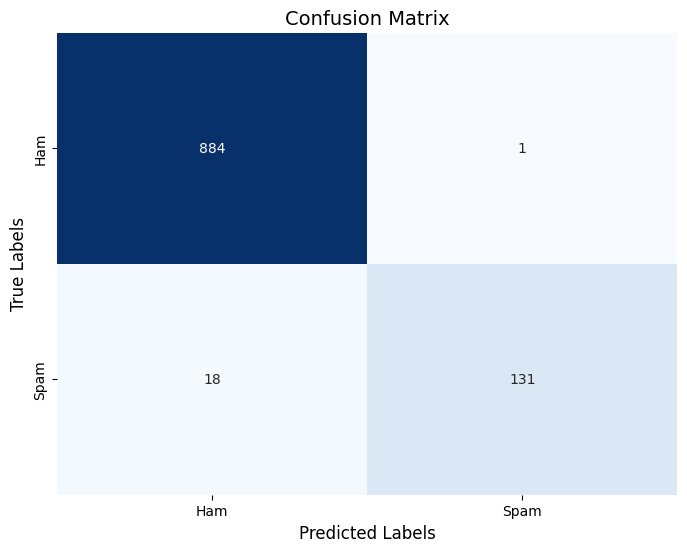

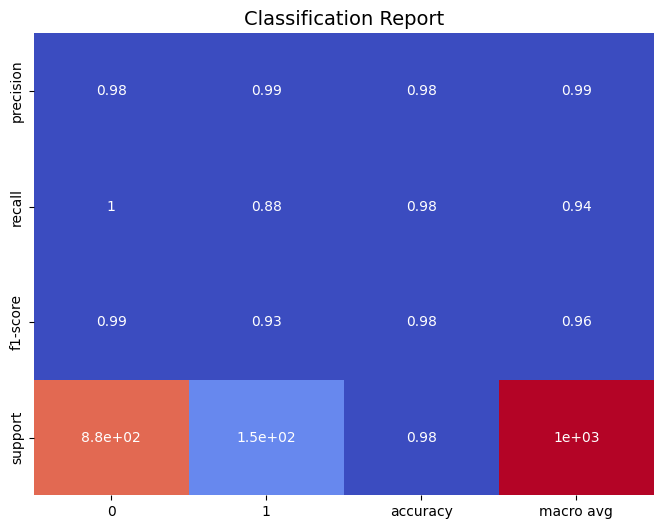

In [ ]:
cm = confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])


plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)

import pandas as pd
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='coolwarm', cbar=False)
plt.title('Classification Report', fontsize=14)
plt.show()
